contact jared with questions on this one

jaredwright217@gmail.com

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/Econ 484 Dream Team'


Mounted at /content/gdrive
/content/gdrive/My Drive/Econ 484 Dream Team


In [ ]:
#import some packages
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

In [ ]:
#read in data
%cd '/content/gdrive/My Drive/Econ 484 Dream Team'
tweets = pd.read_csv('/content/gdrive/My Drive/Econ 484 Dream Team/tweet_features.csv')
tweets.head()

[Errno 2] No such file or directory: '/content/gdrive/My Drive/Econ 484 Dream Team'
/content


NameError: ignored

In [ ]:
#split data into train and test sets
X = tweets.drop(columns=['populism'])
y = tweets['populism']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=24)    


In [ ]:
#check the dataframe for the number of populist tweets
print(y.value_counts())

False    1422
True      355
Name: populism, dtype: int64


Accuracy on training set: 0.826
Accuracy on test set: 0.799


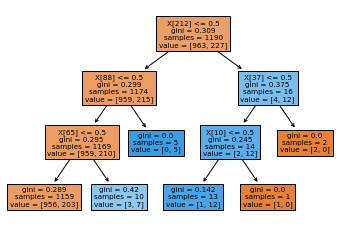

In [ ]:
# I run a decision tree here just to see the visualize the data and make sure it looks as I expect it to.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

fig = plt.figure()
_ = tree.plot_tree(clf, filled=True)
plt.show()

In [ ]:
#The words chosen by the decision tree
print(X.columns[212])
print(X.columns[88], X.columns[37])
print(X.columns[65], X.columns[10])


media
dirty center
corrupt answer


In [ ]:
#we don't need to normalize data since the training data only has booleans
print(X_train)
print(y_train)

      able  access  accompanied  according  ...  yes  yesterday  young  youth
1663     0       0            0          0  ...    0          0      0      0
799      0       0            0          0  ...    0          0      0      0
1392     0       0            0          0  ...    0          0      0      0
1406     0       0            0          0  ...    0          0      0      0
1539     0       0            0          0  ...    0          0      0      0
...    ...     ...          ...        ...  ...  ...        ...    ...    ...
1425     0       0            0          0  ...    0          0      0      0
343      0       0            0          0  ...    0          0      0      0
192      0       0            0          0  ...    0          0      0      0
899      0       0            0          0  ...    0          0      0      0
418      0       0            0          0  ...    0          0      0      0

[1190 rows x 402 columns]
1663    False
799     False
1392    F

In [ ]:
#a basic net just to see how it does.
net = MLPClassifier(solver='lbfgs', random_state=24)
net.fit(X_train, y_train)

print(net.score(X_test, y_test))
#0.795% accuracy on the test set

0.7512776831345827


In [ ]:
#this takes about 10 minutes to run.
#the output is at the bottom of the cell.

from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'hidden_layer_sizes': [(5,),(10,),(25,)],
    'activation': ['relu'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [.01, .05, .1, .5, 1, 5, 10],
    'max_iter': [10000],
    'early_stopping': [True, False],
    'max_fun': [3000, 1500]
}

clf = MLPClassifier(random_state=24)
clf_rand = RandomizedSearchCV(estimator = clf, param_distributions = random_grid,
                               n_iter = 100, cv = 3, random_state=24)

clf_rand.fit(X_train, y_train)
print(clf_rand.best_params_)
print('score on training set: {:.4f}'.format(clf_rand.score(X_train, y_train)))
print('score on test set: {:.4f}'.format(clf_rand.score(X_test, y_test)))

#[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 45.0min finished
#{'solver': 'adam', 'max_iter': 2000, 'max_fun': 1500, 'hidden_layer_sizes': (10,), 'early_stopping': False, 'alpha': 0.5, 'activation': 'relu'}
#'solver': 'adam', 'max_iter': 2000, 'max_fun': 1500, 'hidden_layer_sizes': (5,), 'early_stopping': False, 'alpha': 10, 'activation': 'relu'

#most recent:
#{'solver': 'adam', 'max_iter': 10000, 'max_fun': 1500, 'hidden_layer_sizes': (5,), 'early_stopping': False, 'alpha': 10, 'activation': 'relu'}
#score on training set: 0.8092
#score on test set: 0.7819

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

{'solver': 'adam', 'max_iter': 10000, 'max_fun': 1500, 'hidden_layer_sizes': (5,), 'early_stopping': False, 'alpha': 10, 'activation': 'relu'}
score on training set: 0.8092
score on test set: 0.7819


In [ ]:
#another net to see how well the random_search parameters perform.
net = MLPClassifier(solver='adam', max_iter=10000, max_fun= 1500, hidden_layer_sizes= (5,), early_stopping= False, alpha= 10, activation= 'relu', random_state=24)
net.fit(X_train, y_train)

print('score on training set: {:.4f}'.format(net.score(X_train, y_train)))
print('score on test set: {:.4f}'.format(net.score(X_test, y_test)))
#{'solver': 'adam', 'max_iter': 2000, 'max_fun': 1500, 'hidden_layer_sizes': (10,), 'early_stopping': False, 'alpha': 0.5, 'activation': 'relu'}

#score on training set: 0.8092
#score on test set: 0.7819

score on training set: 0.8092
score on test set: 0.7819


In [ ]:
#This parameter grid is refining further the randomized search output. 
#{'solver': 'adam', 'max_iter': 2000, 'max_fun': 1500, 'hidden_layer_sizes': (10,), 'early_stopping': False, 'alpha': 0.5, 'activation': 'relu'}
param_grid = {
    'hidden_layer_sizes': [(3,),(4,),(5,),(6,),(7,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [2,3,4],
    'max_iter': [10000],
    'early_stopping': [False],
    'max_fun': [1000, 1500, 2000]
}

netsearch = MLPClassifier()
# grid search model with 3 folds
grid_search = GridSearchCV(estimator=netsearch, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

#{'activation': 'relu', 'alpha': 0.2, 'early_stopping': False, 'hidden_layer_sizes': (5,), 'max_fun': 1500, 'max_iter': 10000, 'solver': 'adam'}
#{'activation': 'relu', 'alpha': 7, 'early_stopping': False, 'hidden_layer_sizes': (4,), 'max_fun': 1500, 'max_iter': 10000, 'solver': 'adam'}
#{'activation': 'relu', 'alpha': 3, 'early_stopping': False, 'hidden_layer_sizes': (5,), 'max_fun': 1500, 'max_iter': 10000, 'solver': 'adam'}
print("Accuracy on training set: {:.3f}".format(grid_search.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(grid_search.score(X_test, y_test)))


#most recent:
#{'activation': 'relu', 'alpha': 2, 'early_stopping': False, 'hidden_layer_sizes': (3,), 'max_fun': 1500, 'max_iter': 10000, 'solver': 'adam'}
#Accuracy on training set: 0.870
#Accuracy on test set: 0.8041

{'activation': 'relu', 'alpha': 2, 'early_stopping': False, 'hidden_layer_sizes': (3,), 'max_fun': 1500, 'max_iter': 10000, 'solver': 'adam'}
Accuracy on training set: 0.870
Accuracy on test set: 0.8041


In [ ]:
#making a net with the ideal parameters 
net = MLPClassifier(hidden_layer_sizes=(3,), activation='relu', alpha=3, early_stopping=False, max_fun=1000, max_iter=10000, solver='adam')
net.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(net.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(net.score(X_test, y_test)))

Accuracy on training set: 0.840
Accuracy on test set: 0.7990


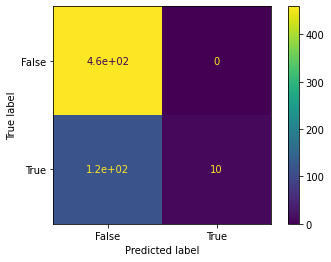

In [ ]:
#plot a confusion matrix here
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
gg = plot_confusion_matrix(net, X_test, y_test)
ConfusionMatrixDisplay(gg, display_labels=True)


In [ ]:
#the numbers from the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, net.predict(X_test)))

[[459   0]
 [118  10]]


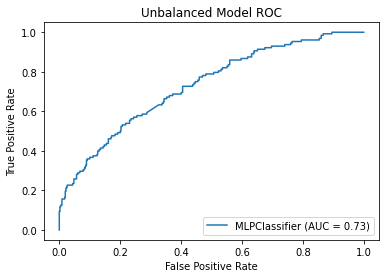

In [ ]:
#a ROC curve
from sklearn import metrics
metrics.plot_roc_curve(net, X_test, y_test) 
plt.title('Unbalanced Model ROC')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()